# Preparation

## Libs

In [1]:
!pip install Sastrawi
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 9.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 7.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 9.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.0 MB/s eta 0:00:00:00:010:01m


In [2]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import some libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import torch
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/erzxn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/erzxn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## df Prep

In [3]:
# from folder tweets-data in this folder merge all csv files into one dataframe pandas
import os
import glob
path = 'tweets-data'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)
df


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1840540824591020337,Sun Sep 29 23:55:02 +0000 2024,1,aku suka pemilu hehe,1840540824591020337,NaN,NaN,in,NaN,1,0,0,https://x.com/yaudahlahpasrah/status/184054082...,1094605073571672065,yaudahlahpasrah
1,1840540740847583671,Sun Sep 29 23:54:42 +0000 2024,56,Pemilu di negeri sekuat Amerika Serikat bisa d...,1840540740847583671,NaN,NaN,in,NaN,1,16,15,https://x.com/ariel_heryanto/status/1840540740...,296143572,ariel_heryanto
2,1840220844053934371,Sun Sep 29 23:51:44 +0000 2024,0,@Chrisyanto21 @raymondchins Ga ada istilah bak...,1840539991367422360,NaN,Chrisyanto21,in,Indonesia Timur,0,1,0,https://x.com/Robert32Arthur/status/1840539991...,942079081134174208,Robert32Arthur
3,1840255028575252762,Sun Sep 29 23:50:36 +0000 2024,0,@ahriesonta Dongeng lagi. Kasihan mereka cari ...,1840539706255360222,NaN,ahriesonta,in,8ft di bawah tanah,0,0,0,https://x.com/Donie707/status/1840539706255360222,1573280097003397121,Donie707
4,1840301498405925348,Sun Sep 29 23:45:45 +0000 2024,0,@LambeResing Kalau demo dia lari paling kencen...,1840538488904794500,NaN,LambeResing,in,8ft di bawah tanah,0,0,0,https://x.com/Donie707/status/1840538488904794500,1573280097003397121,Donie707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1839945074555122152,Sun Sep 29 05:10:30 +0000 2024,24,@goraici Nunggu ada penelitian yang mengasosia...,1840257823609106770,NaN,goraici,in,Jakarta,0,0,1,https://x.com/elisa_jkt/status/184025782360910...,44556194,elisa_jkt
1554,1840010394980741484,Sun Sep 29 05:09:36 +0000 2024,0,@Adiprayitno_20 Dah biarin aja Mungkin sesuai ...,1840257599528415258,NaN,Adiprayitno_20,in,Russia,0,0,0,https://x.com/SManikmoyo/status/18402575995284...,1244476057891160064,SManikmoyo
1555,1839528669749846453,Sun Sep 29 04:54:19 +0000 2024,1,@Pegulatmasa @sayamakibao @xD34DBE3F @BuYungBi...,1840253752634421486,https://pbs.twimg.com/media/GYnlCEsbMAAbG1Q.jpg,Pegulatmasa,in,NaN,0,1,0,https://x.com/FurqanIbr64677/status/1840253752...,1669742231228682241,FurqanIbr64677
1556,1840253649722757263,Sun Sep 29 04:53:55 +0000 2024,0,Pada hari Minggu tanggal 29 September 2024 Per...,1840253649722757263,https://pbs.twimg.com/media/GYnk7lnasAINU_3.jpg,NaN,in,NaN,0,0,0,https://x.com/PolsekLing62979/status/184025364...,1768901743465897984,PolsekLing62979


## Labeling

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("w11wo/indonesian-roberta-base-sentiment-classifier")
model = AutoModelForSequenceClassification.from_pretrained("w11wo/indonesian-roberta-base-sentiment-classifier")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [7]:
def robertalabel(text):
    # Truncate the input text to the maximum sequence length
    max_length = pipe.tokenizer.model_max_length
    text = text[:513]  # Truncate if text is too long

    sentiment = pipe(str(text))
    print(text)
    return sentiment[0]['label']

def robertascore(text):
  max_length = pipe.tokenizer.model_max_length
  text = text[:513]  # Truncate if text is too long

  sentiment = pipe(str(text))
  return sentiment[0]['score']

print(robertalabel('bukan mau bela knet yah tapi musibah'))
print(robertascore('bukan mau bela knet yah tapi musibah'))

bukan mau bela knet yah tapi musibah
negative
0.9749892950057983


In [9]:
# label the df using roberta label and roberta score
df['label'] = df['full_text'].apply(robertalabel)
df['score'] = df['full_text'].apply(robertascore)

aku suka pemilu hehe
Pemilu di negeri sekuat Amerika Serikat bisa ditembus tangan-tangan jahil Rusia. Saatnya kita bertanya apakah pemilu di negeri kita sendiri bebas dari campur tangan asing? https://t.co/UjkiXbuAJa
@Chrisyanto21 @raymondchins Ga ada istilah bakar duit di pemilu dan pilkada toh dgn adanya pilkada dan pemilu rakyat menengah kebawah justru terbantu..makanya sering2 terlibat dalam pemilu/pilkada biar paham
@ahriesonta Dongeng lagi. Kasihan mereka cari makan terpaksa uji nyali dan sekarang jadi tersangka 
@LambeResing Kalau demo dia lari paling kenceng. Dulkemit
@intinyadeh Sory setau gua ada UNiversitas Itil Pencuci Uang kalau ejaan tailand hepengumbahumbah ikenanguniversitaseasu bijipelerengarang. Ngk tau kalau udah berubah
@joni_jovi @EXCOPARTAIBURUH intinya kalo membentuk parpol semua ingin berkuasa... dari Pemilu tahun kapan jg sudah muncul Partai Buruh jaman Alm Mukhtar Pakpahan. buruh hanya dijadikan 'alat' utk memperoleh dukungan &amp; simpati coba lihat kenyataan

In [10]:
#save the df to csv
df.to_csv('data/labelled_tweets.csv', index=False)

## Preprocessing

In [3]:
# Some functions for preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text


def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


In [4]:
import json
def deSlangText(text):
  kamus_slang = {}
  with open('slang_dict/combined.txt', 'r') as file:
    kamus_slang = json.load(file)

  # Tokenize the text
  words = text.split()

  # Replace slang words with formal words
  new_words = [kamus_slang.get(word, word) for word in words]

  # Join the words back into a sentence
  new_text = ' '.join(new_words)

  return new_text

# Example usage
text = "gw abis makan ad yg mau ikut?"
formal_text = deSlangText(text)
print(formal_text)  # Output: "saya habis makan ada yang mau ikut?"


saya habis makan ada yang mau ikut?


In [14]:
# Preprocessing tweets data
# Handle non-string values in 'Review' column
df['text_clean'] = df['full_text'].astype(str).apply(cleaningText)
df['casefolding'] = df['text_clean'].apply(casefoldingText)
# # df.drop(['Review'], axis = 1, inplace = True)

df['text_deslanged'] = df['casefolding'].apply(deSlangText)
df['text_preprocessed'] = df['text_deslanged'].apply(tokenizingText)
df['text_filtered'] = df['text_preprocessed'].apply(filteringText)
df['text_stemmed'] = df['text_filtered'].apply(stemmingText)
df['text_classifier'] = df['text_stemmed'].apply(toSentence)


## drop duplicates/spams df
df.drop_duplicates(subset = 'text_clean', inplace = True)

# Replace empty strings or strings with only whitespace with NaN
df['text_classifier'].replace('', np.nan, inplace=True)
df['text_classifier'].replace(' ', np.nan, inplace=True)  # Replace single space

# Now drop rows where 'text_classifier' is NaN
df.dropna(subset=['text_classifier'], inplace=True)

df['sentiment'] = df['text_classifier'].apply(robertalabel)
df['s_score'] = df['text_classifier'].apply(robertascore)

# Export to csv file
df.to_csv(r'preprocessed_police2024.csv', index = False, header = True,index_label=None)

df

suka milu he
milu negeri kuat amerika serikat tembus tangantangan jahil rusia milu negeri bebas campur tangan asing
ga istilah bakar duit milu pilih kepala daerah pilih kepala daerah milu rakyat tengah bawah terbantumakanya libat pemilupilkada biar paham
dongeng kasihan cari makan paksa uji nyali sangka
demo lari kenceng dulkemit
maaf tau universitas itil cuci uang eja tailand hepengumbahumbah ikenanguniversitaseasu bijipelerengarang ngk ubah
jovi inti bentuk partai politik kuasa milu muncul partai buruh jaman alm mukhtar pakpahan buruh jadi alat oleh dukung amp simpati coba lihat nyata buruh sejahtera
november pas milu libur gatau bijak kerja bedabeda sisa cuman nataru
maaf balas zionis harap bangkit gak uang uang milu milu amerika sepi uang simpan simpan uang jagajaga bentuk utang
anjayyy banget umbul umbul kayak milu
opsisi gaya alas dungu iya kali orang diskusi pecah belah bangsa
muka ngk bohong orang kaya nasip gar tuhan beda ma okb kaya dynasi korupsi jabat susah kelompok kera ka

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,score,text_clean,casefolding,text_deslanged,text_preprocessed,text_filtered,text_stemmed,text_classifier,sentiment,s_score
0,1840540824591020337,Sun Sep 29 23:55:02 +0000 2024,1,aku suka pemilu hehe,1840540824591020337,NaN,NaN,in,NaN,1,...,0.999247,aku suka pemilu hehe,aku suka pemilu hehe,aku suka pemilu he,"[aku, suka, pemilu, he]","[suka, pemilu, he]","[suka, milu, he]",suka milu he,positive,0.997786
1,1840540740847583671,Sun Sep 29 23:54:42 +0000 2024,56,Pemilu di negeri sekuat Amerika Serikat bisa d...,1840540740847583671,NaN,NaN,in,NaN,1,...,0.993380,Pemilu di negeri sekuat Amerika Serikat bisa d...,pemilu di negeri sekuat amerika serikat bisa d...,pemilu di negeri sekuat amerika serikat bisa d...,"[pemilu, di, negeri, sekuat, amerika, serikat,...","[pemilu, negeri, sekuat, amerika, serikat, dit...","[milu, negeri, kuat, amerika, serikat, tembus,...",milu negeri kuat amerika serikat tembus tangan...,negative,0.808933
2,1840220844053934371,Sun Sep 29 23:51:44 +0000 2024,0,@Chrisyanto21 @raymondchins Ga ada istilah bak...,1840539991367422360,NaN,Chrisyanto21,in,Indonesia Timur,0,...,0.640750,Ga ada istilah bakar duit di pemilu dan pilkad...,ga ada istilah bakar duit di pemilu dan pilkad...,ga ada istilah bakar duit di pemilu dan pemili...,"[ga, ada, istilah, bakar, duit, di, pemilu, da...","[ga, istilah, bakar, duit, pemilu, pemilihan, ...","[ga, istilah, bakar, duit, milu, pilih, kepala...",ga istilah bakar duit milu pilih kepala daerah...,neutral,0.996020
3,1840255028575252762,Sun Sep 29 23:50:36 +0000 2024,0,@ahriesonta Dongeng lagi. Kasihan mereka cari ...,1840539706255360222,NaN,ahriesonta,in,8ft di bawah tanah,0,...,0.998911,Dongeng lagi Kasihan mereka cari makan terpaks...,dongeng lagi kasihan mereka cari makan terpaks...,dongeng lagi kasihan mereka cari makan terpaks...,"[dongeng, lagi, kasihan, mereka, cari, makan, ...","[dongeng, kasihan, cari, makan, terpaksa, uji,...","[dongeng, kasihan, cari, makan, paksa, uji, ny...",dongeng kasihan cari makan paksa uji nyali sangka,negative,0.999311
4,1840301498405925348,Sun Sep 29 23:45:45 +0000 2024,0,@LambeResing Kalau demo dia lari paling kencen...,1840538488904794500,NaN,LambeResing,in,8ft di bawah tanah,0,...,0.998190,Kalau demo dia lari paling kenceng Dulkemit,kalau demo dia lari paling kenceng dulkemit,kalau demo dia lari paling kenceng dulkemit,"[kalau, demo, dia, lari, paling, kenceng, dulk...","[demo, lari, kenceng, dulkemit]","[demo, lari, kenceng, dulkemit]",demo lari kenceng dulkemit,negative,0.999230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1840255455916110323,Sun Sep 29 05:19:18 +0000 2024,3,@PartaiSocmed Gak tau malu orang2 yg jagoannya...,1840260041779339481,NaN,Drg_Slr,in,Galaksi Bimasakti,0,...,0.998761,Gak tau malu orang yg jagoannya kalah pilpres ...,gak tau malu orang yg jagoannya kalah pilpres ...,gak tahu malu orang yang jagoannya kalah pilpr...,"[gak, tahu, malu, orang, yang, jagoannya, kala...","[gak, malu, orang, jagoannya, kalah, pilpres, ...","[gak, malu, orang, jago, kalah, pilpres, ngemi...",gak malu orang jago kalah pilpres ngemisngemis...,negative,0.980377
1553,1839945074555122152,Sun Sep 29 05:10:30 +0000 2024,24,@goraici Nunggu ada penelitian yang mengasosia...,1840257823609106770,NaN,goraici,in,Jakarta,0,...,0.987744,Nunggu ada penelitian yang mengasosiakan sebar...,nunggu ada penelitian yang mengasosiakan sebar...,nunggu ada penelitian yang mengasosiakan sebar...,"[nunggu, ada, penelitian, yang, mengasosiakan,...","[nunggu, penelitian, mengasosiakan, sebaran, k...","[nunggu, teliti, mengasosiakan, sebar, kuantit...",nunggu teliti mengasosiakan sebar kuantitas ba...,neutral,0.998528
1554,1840010394980741484,Sun Sep 29 05:09:36 +0000 2024,0,@Adiprayitno_20 Dah biarin aja Mungkin sesuai ...,1840257599528415258,NaN,Adiprayitno_20,in,Russia,0,...,0.855520,Dah biarin

In [17]:
# drop id_str, image_url,in_reply_to_screen_name, lang, quote_count
df.drop(['id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'quote_count'], axis = 1, inplace = True)
df.drop(['reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username'], axis = 1, inplace = True)
df.drop(['conversation_id_str', 'favorite_count'], axis = 1, inplace = True)
df

,created_at,full_text,location,label,score,text_clean,casefolding,text_deslanged,text_preprocessed,text_filtered,text_stemmed,text_classifier,sentiment,s_score
0,Sun Sep 29 23:55:02 +0000 2024,aku suka pemilu hehe,NaN,positive,0.999247,aku suka pemilu hehe,aku suka pemilu hehe,aku suka pemilu he,"[aku, suka, pemilu, he]","[suka, pemilu, he]","[suka, milu, he]",suka milu he,positive,0.997786
1,Sun Sep 29 23:54:42 +0000 2024,Pemilu di negeri sekuat Amerika Serikat bisa d...,NaN,negative,0.993380,Pemilu di negeri sekuat Amerika Serikat bisa d...,pemilu di negeri sekuat amerika serikat bisa d...,pemilu di negeri sekuat amerika serikat bisa d...,"[pemilu, di, negeri, sekuat, amerika, serikat,...","[pemilu, negeri, sekuat, amerika, serikat, dit...","[milu, negeri, kuat, amerika, serikat, tembus,...",milu negeri kuat amerika serikat tembus tangan...,negative,0.808933
2,Sun Sep 29 23:51:44 +0000 2024,@Chrisyanto21 @raymondchins Ga ada istilah bak...,Indonesia Timur,positive,0.640750,Ga ada istilah bakar duit di pemilu dan pilkad...,ga ada istilah bakar duit di pemilu dan pilkad...,ga ada istilah bakar duit di pemilu dan pemili...,"[ga, ada, istilah, bakar, duit, di, pemilu, da...","[ga, istilah, bakar, duit, pemilu, pemilihan, ...","[ga, istilah, bakar, duit, milu, pilih, kepala...",ga istilah bakar duit milu pilih kepala daerah...,neutral,0.996020
3,Sun Sep 29 23:50:36 +0000 2024,@ahriesonta Dongeng lagi. Kasihan mereka cari ...,8ft di bawah tanah,negative,0.998911,Dongeng lagi Kasihan mereka cari makan terpaks...,dongeng lagi kasihan mereka cari makan terpaks...,dongeng lagi kasihan mereka cari makan terpaks...,"[dongeng, lagi, kasihan, mereka, cari, makan, ...","[dongeng, kasihan, cari, makan, terpaksa, uji,...","[dongeng, kasihan, cari, makan, paksa, uji, ny...",dongeng kasihan cari makan paksa uji nyali sangka,negative,0.999311
4,Sun Sep 29 23:45:45 +0000 2024,@LambeResing Kalau demo dia lari paling kencen...,8ft di bawah tanah,negative,0.998190,Kalau demo dia lari paling kenceng Dulkemit,kalau demo dia lari paling kenceng dulkemit,kalau demo dia lari paling kenceng dulkemit,"[kalau, demo, dia, lari, paling, kenceng, dulk...","[demo, lari, kenceng, dulkemit]","[demo, lari, kenceng, dulkemit]",demo lari kenceng dulkemit,negative,0.999230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,Sun Sep 29 05:19:18 +0000 2024,@PartaiSocmed Gak tau malu orang2 yg jagoannya...,Galaksi Bimasakti,negative,0.998761,Gak tau malu orang yg jagoannya kalah pilpres ...,gak tau malu orang yg jagoannya kalah pilpres ...,gak tahu malu orang yang jagoannya kalah pilpr...,"[gak, tahu, malu, orang, yang, jagoannya, kala...","[gak, malu, orang, jagoannya, kalah, pilpres, ...","[gak, malu, orang, jago, kalah, pilpres, ngemi...",gak malu orang jago kalah pilpres ngemisngemis...,negative,0.980377
1553,Sun Sep 29 05:10:30 +0000 2024,@goraici Nunggu ada penelitian yang mengasosia...,Jakarta,neutral,0.987744,Nunggu ada penelitian yang mengasosiakan sebar...,nunggu ada penelitian yang mengasosiakan sebar...,nunggu ada penelitian yang mengasosiakan sebar...,"[nunggu, ada, penelitian, yang, mengasosiakan,...","[nunggu, penelitian, mengasosiakan, sebaran, k...","[nunggu, teliti, mengasosiakan, sebar, kuantit...",nunggu teliti mengasosiakan sebar kuantitas ba...,neutral,0.998528
1554,Sun Sep 29 05:09:36 +0000 2024,@Adiprayitno_20 Dah biarin aja Mungkin sesuai ...,Russia,neutral,0.855520,Dah biarin aja Mungkin sesuai ramalan Prabowo ...,dah biarin aja mungkin sesuai ramalan prabowo ...,deh biarin saja mungkin sesuai ramalan prabowo...,"[deh, biarin, saja, mungkin, sesuai, ramalan, ...","[deh, biarin, sesuai, ramalan, prabowo, pilpre...","[deh, biarin, sesuai, ramal, prabowo, pilpres,...",deh biarin sesuai ramal prabowo pilpres indone...,neutral,0.586888
1555,Sun Sep 29 04:54:19 +0000 2024,@Pegulatmasa @sayamakibao @xD34DBE3F @BuYungBi...,NaN,negative,0.997678,Goblog gak bisa membaca APBN sekarang APBN def...,goblog gak bisa membaca apbn sekarang apbn de

In [5]:
# load the preprocessed data from preprocessed_police2024.csv
df = pd.read_csv('preprocessed_police2024.csv')

# EDA

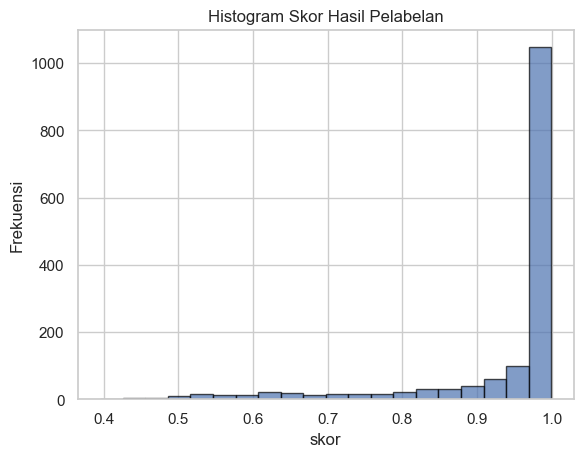

In [6]:
# Plot histogram
plt.hist(df['s_score'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('skor')
plt.ylabel('Frekuensi')
plt.title('Histogram Skor Hasil Pelabelan')
plt.show()

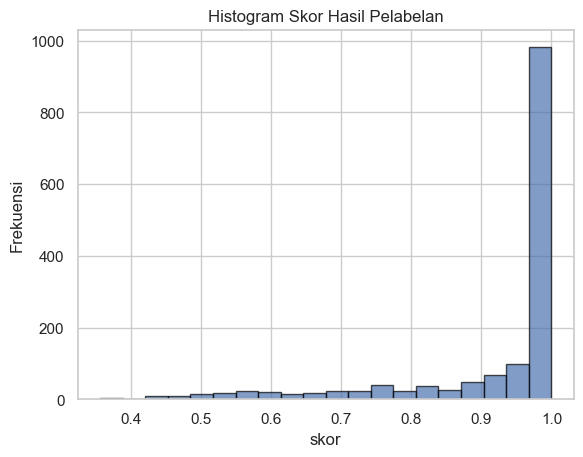

In [7]:
# Plot histogram
plt.hist(df['score'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('skor')
plt.ylabel('Frekuensi')
plt.title('Histogram Skor Hasil Pelabelan')
plt.show()

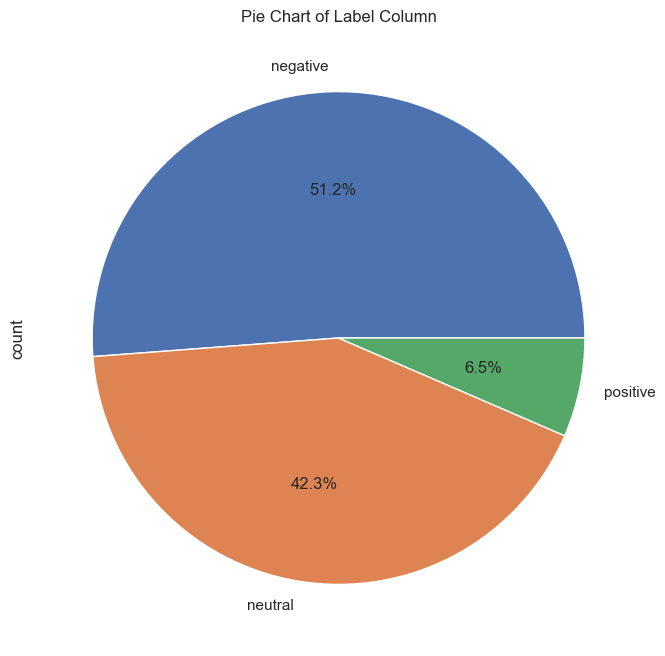

In [8]:
# plot a pie chart for label column
plt.figure(figsize=(8, 8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Label Column')
plt.show()

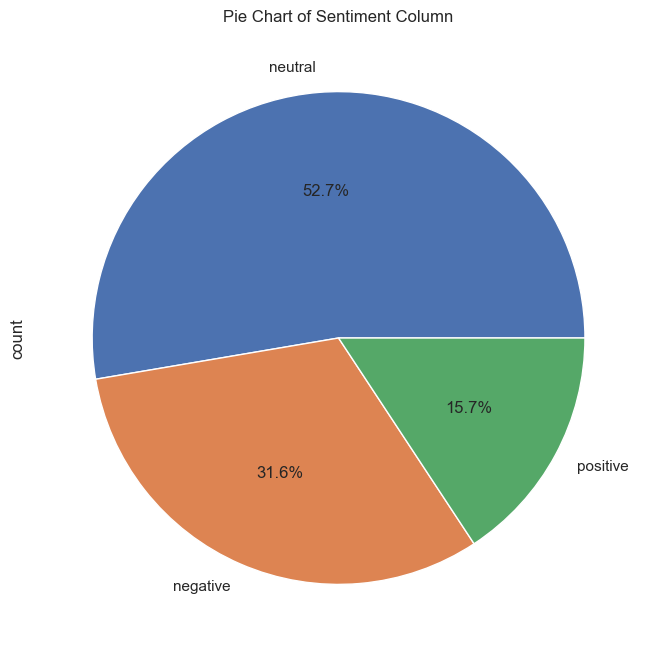

In [9]:
# plot a pie chart for sentiment column
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Sentiment Column')
plt.show()


## Wordcloud label

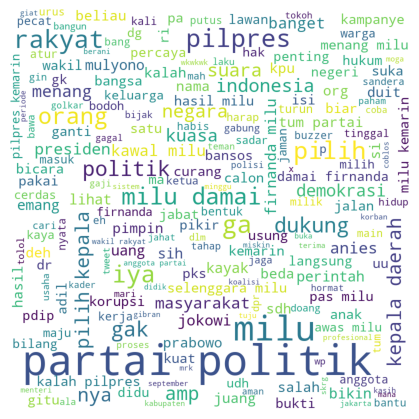

In [10]:
# make a wordcloud for text_classifier column
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(' '.join(df['text_classifier']))
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


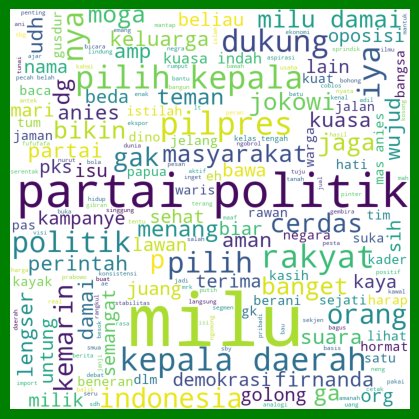

In [11]:
# make a wordcloud for text_classifier, but only for positive label from 'label' column
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(' '.join(df[df['label'] == 'positive']['text_classifier']))
plt.figure(figsize = (4, 4), facecolor = 'green')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



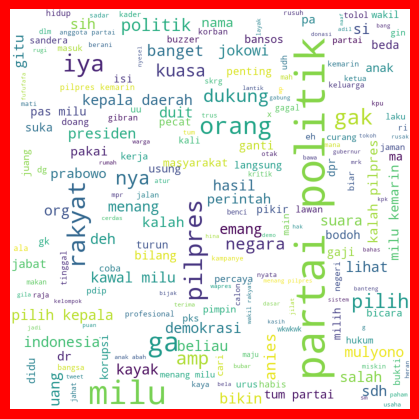

In [12]:
# make a wordcloud for text_classifier, but only for positive label from 'label' column
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(' '.join(df[df['label'] == 'negative']['text_classifier']))
plt.figure(figsize = (4, 4), facecolor = 'red')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



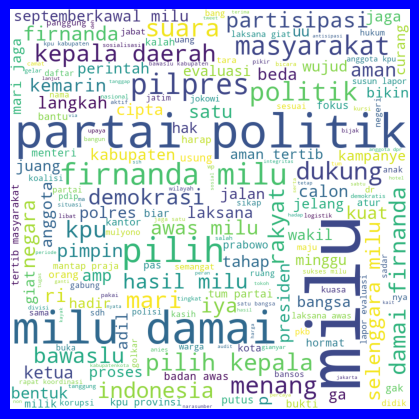

In [13]:
# make a wordcloud for text_classifier, but only for positive label from 'label' column
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(' '.join(df[df['label'] == 'neutral']['text_classifier']))
plt.figure(figsize = (4, 4), facecolor = 'blue')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



# Training

## Training Prep

### Label Encoder

In [14]:
# Encode the label column to 0 negative, 1 neutral, 2 positive
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['label'] = labelencoder.fit_transform(df['label'])
df['sentiment'] = labelencoder.fit_transform(df['sentiment'])
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,score,text_clean,casefolding,text_deslanged,text_preprocessed,text_filtered,text_stemmed,text_classifier,sentiment,s_score
0,1840540824591020337,Sun Sep 29 23:55:02 +0000 2024,1,aku suka pemilu hehe,1840540824591020337,NaN,NaN,in,NaN,1,...,0.999247,aku suka pemilu hehe,aku suka pemilu hehe,aku suka pemilu he,"['aku', 'suka', 'pemilu', 'he']","['suka', 'pemilu', 'he']","['suka', 'milu', 'he']",suka milu he,2,0.997786
1,1840540740847583671,Sun Sep 29 23:54:42 +0000 2024,56,Pemilu di negeri sekuat Amerika Serikat bisa d...,1840540740847583671,NaN,NaN,in,NaN,1,...,0.993380,Pemilu di negeri sekuat Amerika Serikat bisa d...,pemilu di negeri sekuat amerika serikat bisa d...,pemilu di negeri sekuat amerika serikat bisa d...,"['pemilu', 'di', 'negeri', 'sekuat', 'amerika'...","['pemilu', 'negeri', 'sekuat', 'amerika', 'ser...","['milu', 'negeri', 'kuat', 'amerika', 'serikat...",milu negeri kuat amerika serikat tembus tangan...,0,0.808933
2,1840220844053934371,Sun Sep 29 23:51:44 +0000 2024,0,@Chrisyanto21 @raymondchins Ga ada istilah bak...,1840539991367422360,NaN,Chrisyanto21,in,Indonesia Timur,0,...,0.640750,Ga ada istilah bakar duit di pemilu dan pilkad...,ga ada istilah bakar duit di pemilu dan pilkad...,ga ada istilah bakar duit di pemilu dan pemili...,"['ga', 'ada', 'istilah', 'bakar', 'duit', 'di'...","['ga', 'istilah', 'bakar', 'duit', 'pemilu', '...","['ga', 'istilah', 'bakar', 'duit', 'milu', 'pi...",ga istilah bakar duit milu pilih kepala daerah...,1,0.996020
3,1840255028575252762,Sun Sep 29 23:50:36 +0000 2024,0,@ahriesonta Dongeng lagi. Kasihan mereka cari ...,1840539706255360222,NaN,ahriesonta,in,8ft di bawah tanah,0,...,0.998911,Dongeng lagi Kasihan mereka cari makan terpaks...,dongeng lagi kasihan mereka cari makan terpaks...,dongeng lagi kasihan mereka cari makan terpaks...,"['dongeng', 'lagi', 'kasihan', 'mereka', 'cari...","['dongeng', 'kasihan', 'cari', 'makan', 'terpa...","['dongeng', 'kasihan', 'cari', 'makan', 'paksa...",dongeng kasihan cari makan paksa uji nyali sangka,0,0.999311
4,1840301498405925348,Sun Sep 29 23:45:45 +0000 2024,0,@LambeResing Kalau demo dia lari paling kencen...,1840538488904794500,NaN,LambeResing,in,8ft di bawah tanah,0,...,0.998190,Kalau demo dia lari paling kenceng Dulkemit,kalau demo dia lari paling kenceng dulkemit,kalau demo dia lari paling kenceng dulkemit,"['kalau', 'demo', 'dia', 'lari', 'paling', 'ke...","['demo', 'lari', 'kenceng', 'dulkemit']","['demo', 'lari', 'kenceng', 'dulkemit']",demo lari kenceng dulkemit,0,0.999230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,1840255455916110323,Sun Sep 29 05:19:18 +0000 2024,3,@PartaiSocmed Gak tau malu orang2 yg jagoannya...,1840260041779339481,NaN,Drg_Slr,in,Galaksi Bimasakti,0,...,0.998761,Gak tau malu orang yg jagoannya kalah pilpres ...,gak tau malu orang yg jagoannya kalah pilpres ...,gak tahu malu orang yang jagoannya kalah pilpr...,"['gak', 'tahu', 'malu', 'orang', 'yang', 'jago...","['gak', 'malu', 'orang', 'jagoannya', 'kalah',...","['gak', 'malu', 'orang', 'jago', 'kalah', 'pil...",gak malu orang jago kalah pilpres ngemisngemis...,0,0.980377
1490,1839945074555122152,Sun Sep 29 05:10:30 +0000 2024,24,@goraici Nunggu ada penelitian yang mengasosia...,1840257823609106770,NaN,goraici,in,Jakarta,0,...,0.987744,Nunggu ada penelitian yang mengasosiakan sebar...,nunggu ada penelitian yang mengasosiakan sebar...,nunggu ada penelitian yang mengasosiakan sebar...,"['nunggu', 'ada', 'penelitian', 'yang', 'menga...","['nunggu', 'penelitian', 'mengasosiakan', 'seb...","['nunggu', 'teliti', 'mengasosiakan', 'sebar',...",nunggu teliti mengasosiakan sebar kuantitas ba...,1,0.998528
1491,1840010394980741484,Sun Sep 29 05:09:36 +0000 2024,0,@Adiprayitno_20 Dah biarin aja Mungkin sesuai ...,1840257599528415258,NaN,Adiprayitno_20,in,Russia,0,...,0.855520,Dah biarin aja Mungki

### TF-IDF Vectorizer & SMOTE Oversampling

In [44]:
X = df['text_classifier']
y = df['label']
ys = df['sentiment']

In [16]:
# tf_idf_ngram_vectorizer to have TF-IDF with bigram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_bi = tf_idf_ngram_vectorizer.fit_transform(X)

In [17]:
oversample = SMOTE()
Xl_bi, yl_bi = oversample.fit_resample(X_bi, y)

In [18]:
oversample = SMOTE()
Xs_bi, ys_bi = oversample.fit_resample(X_bi, ys)

In [22]:
# train test split for xl_bi, yl_bi
X_train, X_test, y_train, y_test = train_test_split(Xl_bi, yl_bi, test_size=0.2, random_state=42)

In [23]:
# train test split for xs_bi, ys_bi
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs_bi, ys_bi, test_size=0.2, random_state=42)

#### Undersampled

In [45]:
X = df['text_classifier']
y = df['label']
ys = df['sentiment']

In [46]:
# tf_idf_ngram_vectorizer to have TF-IDF with bigram
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
Xn_bi = tf_idf_ngram_vectorizer.fit_transform(X)

In [47]:
#undersample the data based on the label column
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
Xnl_bi, ynl = rus.fit_resample(Xn_bi, y)
Xns_bi, yns = rus.fit_resample(Xn_bi, ys)

In [48]:
# train test split for xs_bi, ys
Xs_train_n, Xs_test_n, ys_train_n, ys_test_n = train_test_split(Xns_bi, yns, test_size=0.2, random_state=42)

In [49]:
# train test split for xs_bi, y
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(Xnl_bi, ynl, test_size=0.2, random_state=42)

# Training Process

## Oversampled 

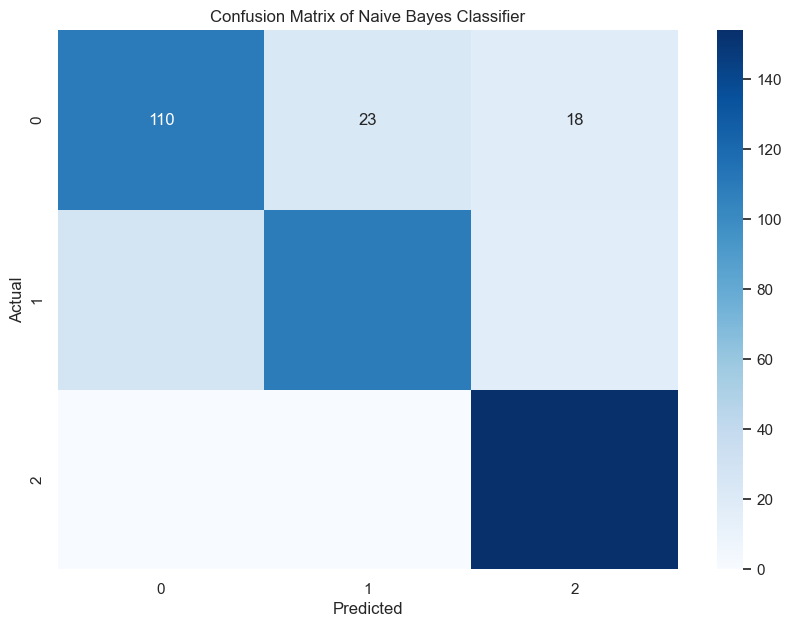

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       151
           1       0.83      0.71      0.76       154
           2       0.81      1.00      0.90       154

    accuracy                           0.81       459
   macro avg       0.81      0.81      0.81       459
weighted avg       0.81      0.81      0.81       459



In [24]:
# training with Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict the test set
y_pred = nb.predict(X_test)

# Print the confusion matrix with plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))
 



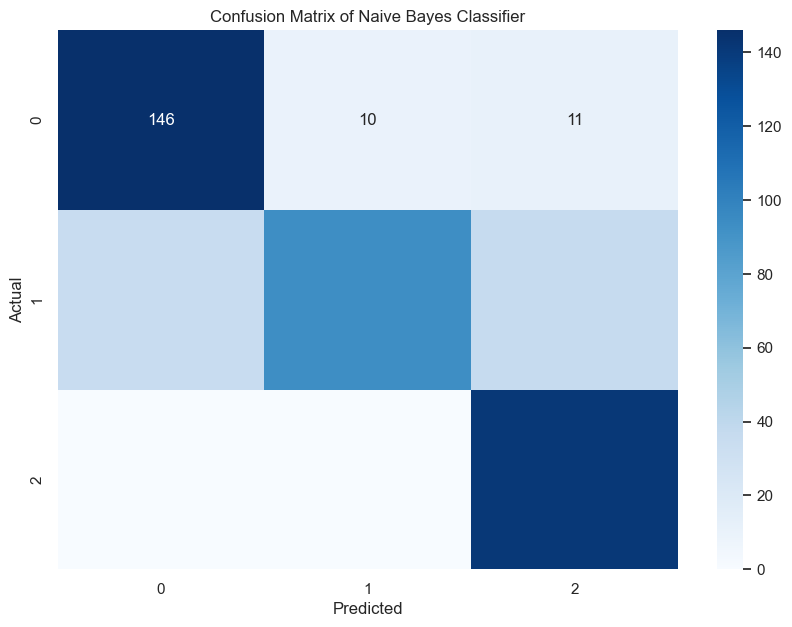

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       167
           1       0.90      0.56      0.69       165
           2       0.75      1.00      0.85       141

    accuracy                           0.80       473
   macro avg       0.82      0.81      0.80       473
weighted avg       0.82      0.80      0.79       473



In [25]:
# training with Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(X_train_s, y_train_s)

# Predict the test set
y_pred_s = nb.predict(X_test_s)

# Print the confusion matrix with plot
cm = confusion_matrix(y_test_s, y_pred_s)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.show()

# Print the classification report
print(classification_report(y_test_s, y_pred_s))
 



## Undersampled

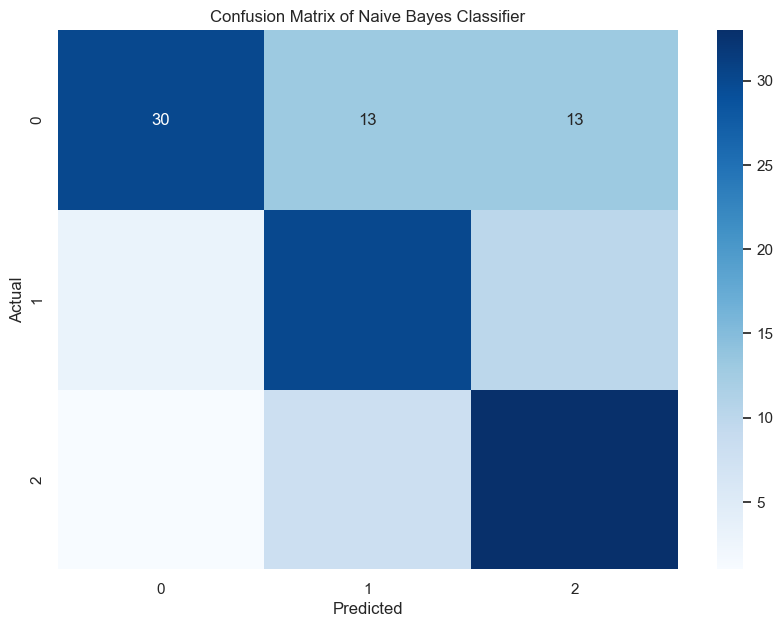

              precision    recall  f1-score   support

           0       0.88      0.54      0.67        56
           1       0.59      0.70      0.64        43
           2       0.59      0.79      0.67        42

    accuracy                           0.66       141
   macro avg       0.69      0.67      0.66       141
weighted avg       0.71      0.66      0.66       141



In [50]:
# training with Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(Xs_train_n, ys_train_n)

# Predict the test set
ys_pred_n = nb.predict(Xs_test_n)

# Print the confusion matrix with plot
cm = confusion_matrix(ys_test_n, ys_pred_n)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.show()

# Print the classification report
print(classification_report(ys_test_n, ys_pred_n))
 



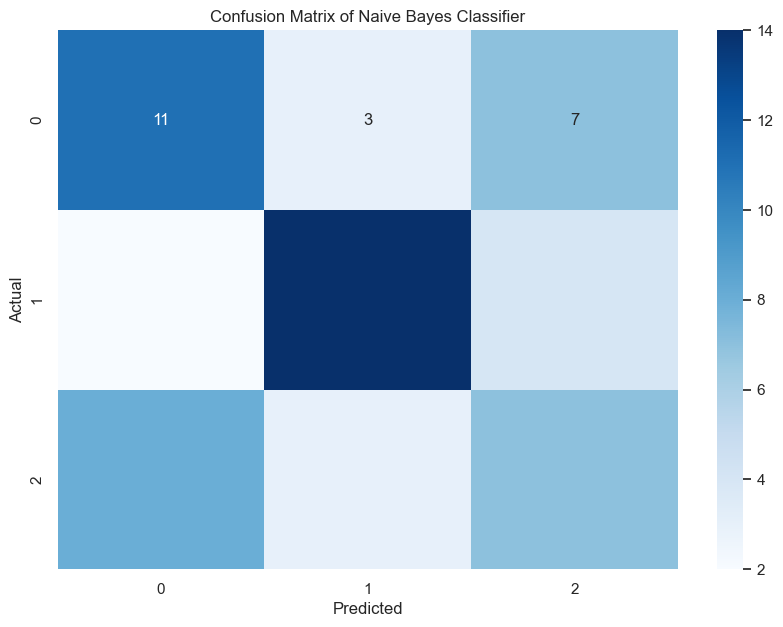

              precision    recall  f1-score   support

           0       0.52      0.52      0.52        21
           1       0.70      0.70      0.70        20
           2       0.39      0.39      0.39        18

    accuracy                           0.54        59
   macro avg       0.54      0.54      0.54        59
weighted avg       0.54      0.54      0.54        59



In [51]:
# training with Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = MultinomialNB()
nb.fit(X_train_n, y_train_n)

# Predict the test set
y_pred_n = nb.predict(X_test_n)

# Print the confusion matrix with plot
cm = confusion_matrix(y_test_n, y_pred_n)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes Classifier')
plt.show()

# Print the classification report
print(classification_report(y_test_n, y_pred_n))
 

